<div align="center">
  <h1 align="center">Figure 2: Plot timeseries, residuals, and models</h1>
  <p align="center"><i>Marie E Galteau, 2023</i></p>

  <table align="cener">
    <tr>
    <td><img align="right" src="https://open-neuroscience.com/post/nilearn/featured.png" alt="image" width="150" /></td>
    <td><img align="right" src="https://d33wubrfki0l68.cloudfront.net/e33fd6f372aa5d51e7b0de4bd763bd983251881e/4b0f4/blog/customising-matplotlib/matplot_title_logo.png" alt="image" width="200" /></td>
    </tr>
  </table>
</div>


---

In [4]:
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn import plotting
import nilearn.plotting as plotting
import matplotlib.pyplot as plt
from nilearn.maskers import NiftiSpheresMasker
from numpy import genfromtxt
import glob 
from numpy import savetxt

### Choose the HRF 

In [5]:
# Init var
analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
first_level_path = analysis_folder+'first_level/'

glover_path = analysis_folder+'first_level/glover/mask_ROIs/'
spm_path = analysis_folder+'first_level/spm/mask_ROIs/'
Two_gammas_path = analysis_folder+'first_level/Two_gammas/mask_ROIs/'
Peak_span_path = analysis_folder+'first_level/Peak_span/mask_ROIs/'

hrf_path = Peak_span_path
hrf = 'Peak_span'
#hrf = 'Peak_span'
#hrf = 'Two_gammas'

### HRF + timeseries + residuals for Fig2

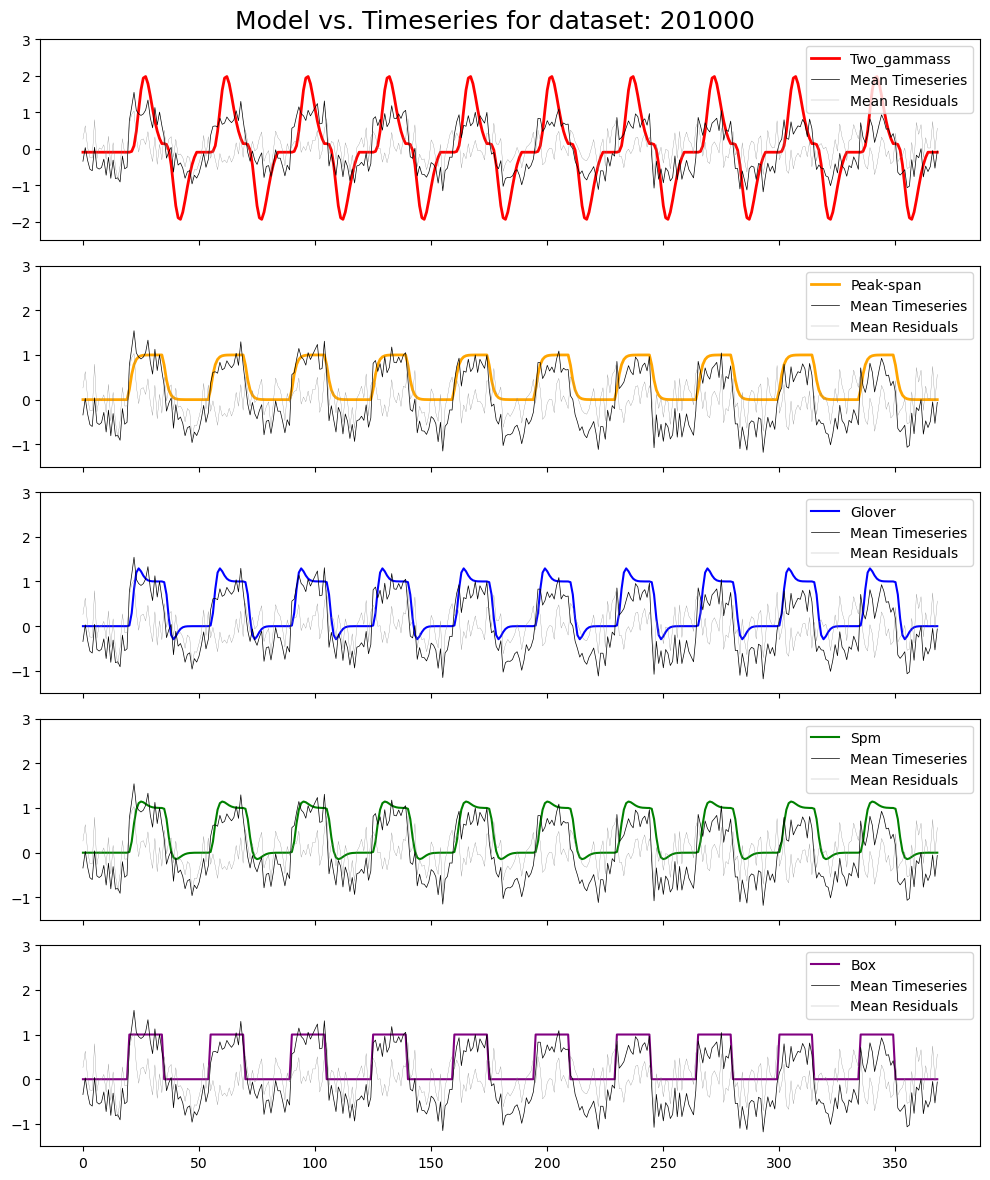

In [39]:

# --- Compute average --- 
all_timeseries = []
all_residuals = []

ds='10'
ds_subj = 201000

for subj_num in range(0,10):
    try:
        residuals_csv = pd.read_csv(Peak_span_path + f'residuals/residuals_sub-020{ds}0{subj_num}_ses-1.csv')
        mean_residuals = (residuals_csv.mean(axis=1) - residuals_csv.mean(axis=1).mean()) / residuals_csv.mean(axis=1).std()
        
        # Append mean residuals to the list
        all_residuals.append(mean_residuals)
        
        timeseries_csv = pd.read_csv(Peak_span_path + f'real_timeseries/real_timeseries_sub-020{ds}0{subj_num}_ses-1.csv')
        mean_timeseries = (timeseries_csv.mean(axis=1) - timeseries_csv.mean(axis=1).mean()) / timeseries_csv.mean(axis=1).std()
        
        # Append mean timeseries to the list
        all_timeseries.append(mean_timeseries)
        
    except FileNotFoundError:
        print(f'Cannot find, ds: {ds} sub:{subj_num}')
        continue
        
# Compute the average of all timeseries/residuals across subjects
average_timeseries = pd.concat(all_timeseries, axis=1).mean(axis=1)
average_residuals = pd.concat(all_residuals, axis=1).mean(axis=1)

# --- Load data ---

Two_gammas_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
Two_gammas_model = Two_gammas_model.iloc[:,1]
Two_gammas_model = (Two_gammas_model - Two_gammas_model.mean()) / Two_gammas_model.std()

Peak_span_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
Peak_span_model = Peak_span_model.iloc[:,1]

glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
glover_model = glover_model.iloc[:,0]

spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
spm_model = spm_model.iloc[:,0]

box_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
box_model = box_model.iloc[:,0]

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# Plot model and residuals in the first subplot (ax1)
ax1.plot(Two_gammas_model, color='red', linewidth=2, label='Two_gammass')
ax2.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span' )
ax3.plot(glover_model, color='blue', linewidth=1.5, label='Glover' )
ax4.plot(spm_model, color='green', linewidth=1.5, label='Spm' )
ax5.plot(box_model, color='purple', linewidth=1.5, label='Box' )

ax1.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax1.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')

ax2.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax2.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')

ax3.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax3.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')

ax4.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax4.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')

ax5.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax5.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')


ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax5.legend()

ax1.set_ylim(-2.5, 3)
ax2.set_ylim(-1.5, 3)
ax3.set_ylim(-1.5, 3)
ax4.set_ylim(-1.5, 3)
ax5.set_ylim(-1.5, 3)

fig.suptitle(f"Model vs. Timeseries for dataset: {ds_subj}", fontsize=18)
plt.tight_layout()

plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/HRFs_timeseries_{ds_subj}.svg', format='svg', dpi=1200) 
plt.show()

Cannot find, ds:02 sub:9


(-1.5, 3.0)

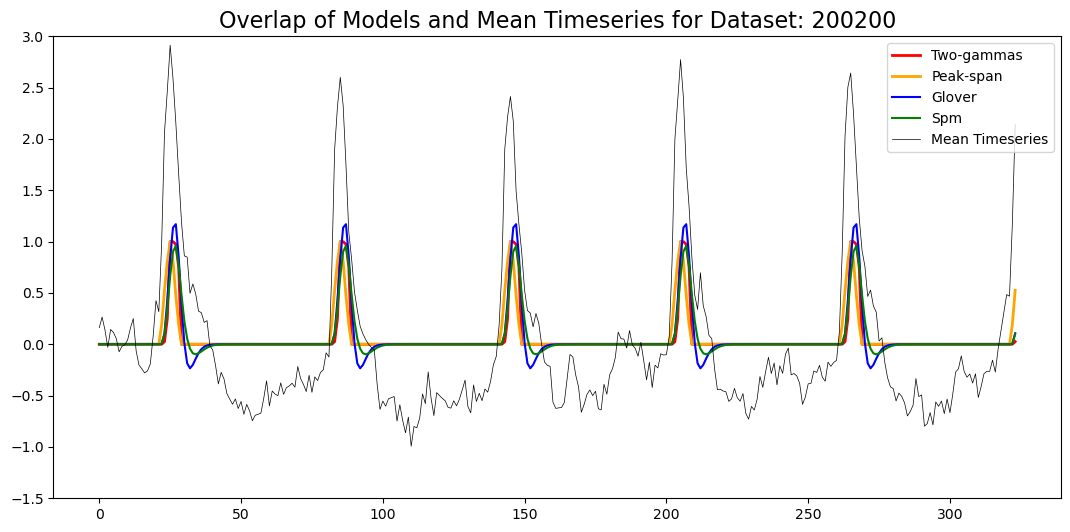

In [4]:
# --- Compute average ---. 
all_timeseries = []
all_residuals = []

ds='02'
ds_subj = 200200
ses='1'

for subj_num in range(0,10):
    try:
        residuals_csv = pd.read_csv(Peak_span_path + f'residuals/residuals_sub-020{ds}0{subj_num}_ses-{ses}.csv')
        mean_residuals = (residuals_csv.mean(axis=1) - residuals_csv.mean(axis=1).mean()) / residuals_csv.mean(axis=1).std()
        
        # Append mean residuals to the list
        all_residuals.append(mean_residuals)
        
        timeseries_csv = pd.read_csv(Peak_span_path + f'real_timeseries/real_timeseries_sub-020{ds}0{subj_num}_ses-{ses}.csv')
        mean_timeseries = (timeseries_csv.mean(axis=1) - timeseries_csv.mean(axis=1).mean()) / timeseries_csv.mean(axis=1).std()
        
        # Append mean timeseries to the list
        all_timeseries.append(mean_timeseries)
        
    except FileNotFoundError:
        print(f'Cannot find, ds:{ds} sub:{subj_num}')
        continue
        
# Compute the average of all timeseries/residuals across subjects
average_timeseries = pd.concat(all_timeseries, axis=1).mean(axis=1)
average_residuals = pd.concat(all_residuals, axis=1).mean(axis=1)

# savetxt(f'/project/4180000.19/multirat_stim/rabies/test_HRF/mean_timeseries/mean-timeseries_ds-{ds}.csv', average_timeseries, delimiter=',')

# --- Load data ---

Two_gammas_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
Two_gammas_model = Two_gammas_model.iloc[:,1]

Peak_span_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
Peak_span_model = Peak_span_model.iloc[:,1]

glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
glover_model = glover_model.iloc[:,0]

spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
spm_model = spm_model.iloc[:,0]

box_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
box_model = box_model.iloc[:,0]

plt.figure(figsize=(13, 6))

plt.plot(Two_gammas_model, color='red', linewidth=2, label='Two-gammas')
plt.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span' )
plt.plot(glover_model, color='blue', linewidth=1.5, label='Glover' )

plt.plot(spm_model, color='green', linewidth=1.5, label='Spm' )
plt.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')

plt.title(f"Overlap of Models and Mean Timeseries for Dataset: {ds_subj}", fontsize=16)
plt.legend()
plt.ylim(-1.5, 3)

#plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/HRFs_overlap_{ds_subj}.svg', format='svg', dpi=1200) 

(-1.5, 3.0)

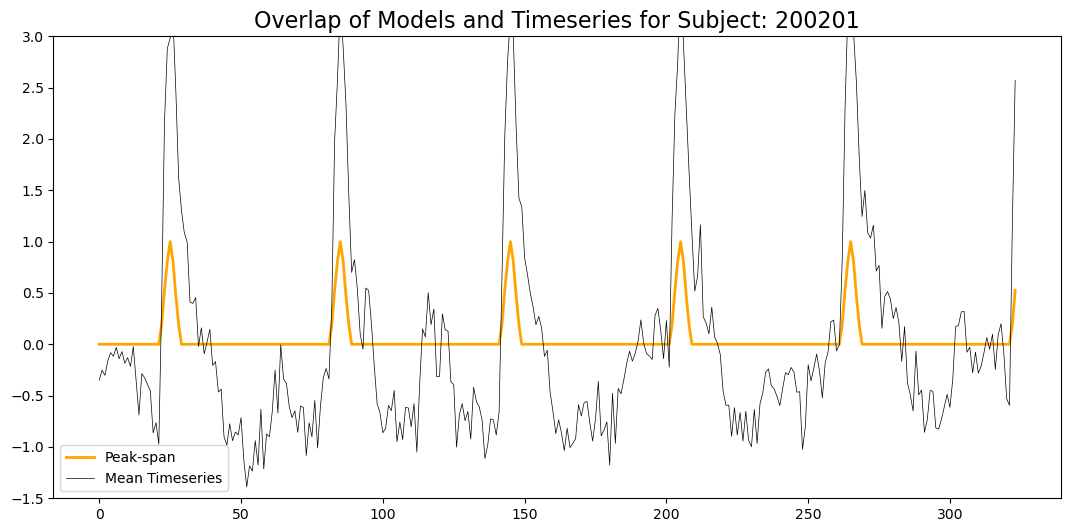

In [16]:
# --- Compute average for 1 scan at a time --- 
all_timeseries = []
all_residuals = []

ds='02'
ds_subj = '200200'
ses='1'

residuals_csv = pd.read_csv(Peak_span_path + f'residuals/residuals_sub-0{ds_subj}_ses-{ses}.csv')
mean_residuals = (residuals_csv.mean(axis=1) - residuals_csv.mean(axis=1).mean()) / residuals_csv.mean(axis=1).std()
        
timeseries_csv = pd.read_csv(Peak_span_path + f'real_timeseries/real_timeseries_sub-0{ds_subj}_ses-{ses}.csv')
mean_timeseries = (timeseries_csv.mean(axis=1) - timeseries_csv.mean(axis=1).mean()) / timeseries_csv.mean(axis=1).std()
  
# --- Load data ---

Two_gammas_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
Two_gammas_model = Two_gammas_model.iloc[:,1]

#savetxt(f'/project/4180000.19/multirat_stim/tmp/2-gammas_ds-{ds_subj}.csv', Two_gammas_model, delimiter=',')


Peak_span_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
Peak_span_model = Peak_span_model.iloc[:,1]

#savetxt(f'/project/4180000.19/multirat_stim/tmp/Peak-span_ds-{ds_subj}.csv', Peak_span_model, delimiter=',')


glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
glover_model = glover_model.iloc[:,0]

spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
spm_model = spm_model.iloc[:,0]

box_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-{ses}.csv')
box_model = box_model.iloc[:,0]

plt.figure(figsize=(13, 6))

#plt.plot(Two_gammas_model, color='red', linewidth=2, label='Two-gammas')
plt.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span' )
#plt.plot(glover_model, color='blue', linewidth=1.5, label='Glover' )

#plt.plot(spm_model, color='green', linewidth=1.5, label='Spm' )
plt.plot(mean_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')

plt.title(f"Overlap of Models and Timeseries for Subject: {ds_subj}", fontsize=16)
plt.legend()
plt.ylim(-1.5, 3)

#plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/HRFs_overlap_{ds_subj}.svg', format='svg', dpi=1200) 

### HRF overlap fig4

In [7]:
# --- Plot HRF overlap for fig 4 ---

# --- Compute average --- 
all_timeseries = []
all_residuals = []

ds='01'
ds_subj = 200100

for subj_num in range(0,10):
    try:
        residuals_csv = pd.read_csv(Peak_span_path + f'residuals/residuals_sub-020{ds}0{subj_num}_ses-1.csv')
        mean_residuals = (residuals_csv.mean(axis=1) - residuals_csv.mean(axis=1).mean()) / residuals_csv.mean(axis=1).std()
        
        # Append mean residuals to the list
        all_residuals.append(mean_residuals)
        
        timeseries_csv = pd.read_csv(Peak_span_path + f'real_timeseries/real_timeseries_sub-020{ds}0{subj_num}_ses-1.csv')
        mean_timeseries = (timeseries_csv.mean(axis=1) - timeseries_csv.mean(axis=1).mean()) / timeseries_csv.mean(axis=1).std()
        
        # Append mean timeseries to the list
        all_timeseries.append(mean_timeseries)
        
    except FileNotFoundError:
        print(f'Cannot find, ds: {ds} sub:{subj_num}')
        continue
        
# Compute the average of all timeseries/residuals across subjects
average_timeseries = pd.concat(all_timeseries, axis=1).mean(axis=1)
average_residuals = pd.concat(all_residuals, axis=1).mean(axis=1)

# --- Load data ---

Two_gammas_model = pd.read_csv(first_level_path+f'Two_gammas/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
Two_gammas_model = Two_gammas_model.iloc[:,1]
#Two_gammas_model = (Two_gammas_model - Two_gammas_model.mean()) / Two_gammas_model.std()

Peak_span_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
Peak_span_model = Peak_span_model.iloc[:,1]

glover_model = pd.read_csv(first_level_path+f'glover/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
glover_model = glover_model.iloc[:,0]

spm_model = pd.read_csv(first_level_path+f'spm/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
spm_model = spm_model.iloc[:,0]

box_model = pd.read_csv(first_level_path+f'Peak_span/matrix/matrix_sub-0{ds_subj}_ses-1.csv')
box_model = box_model.iloc[:,0]

# Create a new figure for the combined plot
plt.figure(figsize=(6, 6))

# Plot all models on the same plot
plt.plot(Two_gammas_model, color='red', linewidth=2, label='Two-gammas')
plt.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span')
plt.plot(glover_model, color='blue', linewidth=1.5, label='Glover')
plt.plot(spm_model, color='green', linewidth=1.5, label='SPM')
plt.plot(box_model, color='purple', linewidth=1.5, label='Box')

# Set x-axis limits to zoom in on the time interval between 80 and 120 seconds
plt.xlim(20, 60)
plt.ylim(-0.5, 2)

plt.legend()
plt.title(f"All Models vs. Timeseries for dataset: {ds_subj}", fontsize=18)
plt.tight_layout()

plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/Fig-4//All_HRFs_timeseries_{ds_subj}.svg', format='svg', dpi=1200)
plt.show()


Cannot find, ds: 02 sub:9


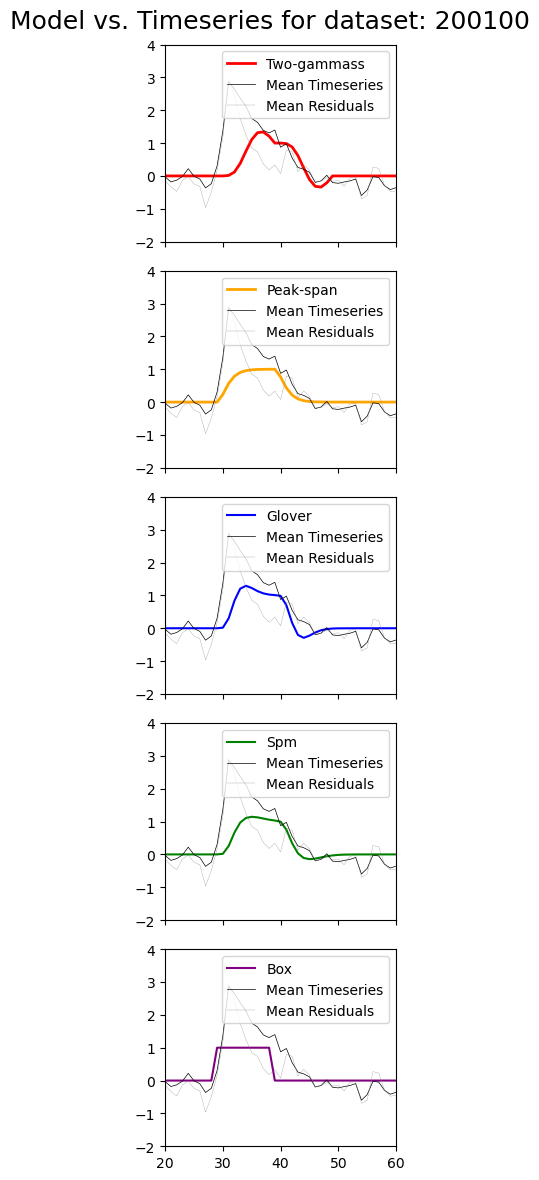

In [38]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(3, 12), sharex=True)

ax1.plot(Two_gammas_model, color='red', linewidth=2, label='Two-gammass')
ax2.plot(Peak_span_model, color='orange', linewidth=2, label='Peak-span')
ax3.plot(glover_model, color='blue', linewidth=1.5, label='Glover')
ax4.plot(spm_model, color='green', linewidth=1.5, label='Spm')
ax5.plot(box_model, color='purple', linewidth=1.5, label='Box')

ax1.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax1.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')

ax2.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax2.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')

ax3.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax3.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')

ax4.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax4.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')

ax5.plot(average_timeseries, color='black', linewidth=0.5, label='Mean Timeseries')
ax5.plot(average_residuals, color='grey', linewidth=0.2, label='Mean Residuals')

# Set x-axis limits to zoom in on the time interval between 80 and 120 seconds
ax1.set_xlim(20, 60)
ax2.set_xlim(20, 60)
ax3.set_xlim(20, 60)
ax4.set_xlim(20, 60)
ax5.set_xlim(20, 60)

# The rest of the code remains the same
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

ax1.set_ylim(-2, 4)
ax2.set_ylim(-2, 4)
ax3.set_ylim(-2, 4)
ax4.set_ylim(-2, 4)
ax5.set_ylim(-2, 4)

fig.suptitle(f"Model vs. Timeseries for dataset: {ds_subj}", fontsize=18)
plt.tight_layout()

plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/HRFs_timeseries/Fig-4//HRFs_timeseries_{ds_subj}.svg', format='svg', dpi=1200)
plt.show()
